<span style='color:Blue'> ORIGINAL </span>

title: Logical structure and dependencies. 
In this chapter different ways to look at the logical structure is explorer. <br>
The logical structure can be viewed as a [directed graph](https://en.wikipedia.org/wiki/Directed_graph). Different graphs are relevant depending on the purpose. More on this to come here <br>

 - The Python package [networkx](https://networkx.org/) is used to store and analyze graphs 
 - The program [Graphviz](https://graphviz.org/) is used to draw nice looking graphs basen on scripts in the dot language
 - The model class writes dot scripts based on the Networkx directed graphs.  
 
The model class contains a number of methods and properties which uses the dependency graphs. A subset is exposed in this chapter. 

# Logical structure and dependencies. 
In this notebook we look at different ways to explore the logical structure of models. 


Modelflow's modelclass writes dot scripts based on [Networkx](https://networkx.org/) directed graphs and uses the program [Graphviz](https://graphviz.org/) when visualizing graphs written in dot language. In this notebook we will look at a subset of Modeflows methods and properties when it comes to exploring and visualizing logical structures as [directed graphs](https://en.wikipedia.org/wiki/Directed_graph). 



## Import the model class
This class incorporates most of the methods used to manage a model. 

In [47]:
 %load_ext autoreload
 %autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<span style='color:Blue'> ORIGINAL </span>

from modelclass import model 
import modeljupyter as mj

model.widescreen()
model.scroll_off()
latex= 0

In [1]:
from modelclass import model 
import modeljupyter as mj

# include info on why this is here 
latex= False

#optional 
model.widescreen()
model.scroll_off()

## Load a pre-existing model, data and descriptions 
The file `pak_exogenized.pcim` contains a dump of model equations, dataframe, simulation options and variable descriptions. 

<span style='color:Blue'> Comment: Working on a common intro to loading this example model </span>

In [49]:
mpak,exostart = model.modelload('../models/pak.pcim',run=1,silent=1)

## Create a dataframe where tax is set to 29

In [50]:
taxvar  = mpak.vlist('PAKGGREVCO2???')   # define lists of the relevant variables. 

In [51]:
nominal_CT= exostart.copy()   # A clean dataframe 
value = 29
nominal_CT.loc[2020:2100,taxvar] = value 

## Run the model with the baseline and with the nominal tax 

In [52]:
res_no_tax   = mpak(exostart,2020,2100,alfa = 0.7)
res_nominal  = mpak(nominal_CT,2020,2100,alfa = 0.7)

<span style='color:Blue'> ORIGINAL </span>

# What is the dependency graph 

Modelflow maintains graphs (networks) of the logical structure of a model. 


# The dependency graph 

Using Modelflow to understand the network of a model. 



<span style='color:Blue'> comment: Not sure about my suggestion. </span>

<span style='color:Blue'> ORIGINAL </span>

## Trace upstream variables: 
The equation for **GDP**


## Trace upstream variables

Let's use the equation for GDP as an example, which in our example model is called 'PAKNYGDPMKTPKN'


In [53]:
mpak.PAKNYGDPMKTPKN.frml

Endogeneous: PAKNYGDPMKTPKN: GDP Expenditure side at market prices 
Formular: FRML  <> PAKNYGDPMKTPKN = PAKNECONPRVTKN+PAKNECONGOVTKN+PAKNEGDIFTOTKN+PAKNEGDISTKBKN+PAKNEEXPGNFSKN-PAKNEIMPGNFSKN+PAKNYGDPDISCKN+PAKADAP*PAKDISPREPKN $

PAKNYGDPMKTPKN: GDP Expenditure side at market prices
PAKADAP       : Switch on adaptation mode (0 or 1)
PAKDISPREPKN  : Investment in disaster risk preparation, constant prices
PAKNECONGOVTKN: Government Consumption
PAKNECONPRVTKN: Household Consumption
PAKNEEXPGNFSKN: Exports (G&S)
PAKNEGDIFTOTKN: Total Gross Capital Formation
PAKNEGDISTKBKN: Change in Inventories
PAKNEIMPGNFSKN: Imports (G&S)
PAKNYGDPDISCKN: Statistical Discrepency (Expenditure Side)



<span style='color:Blue'> ORIGINAL </span>

### The incoming variables (the variables on the right hand side) can be displayed as a graph

If latex == True then on mouseover the variable the equation for each variable is displayed
and on mouseover the edge the percent explanation for this variable is displayed

The width of the arrow reflect how much of the impact can be attributed to this variable. 

<span style='color:Blue'> Comment: Its latex == False ?  or latex== 0. When I put latex == True, then I cant hover over</span>

### .tracepre() The incoming variables 

The incoming variables (the variables on the right hand side) can be displayed as a graph by using the tracepre method. 

In the beginning of this tutorial, we set latex== False. This means that the graphs are interactive. When you hover over the nodes (the variable names) then the equation of each variable is displayed. If you hover over the edges (the arrows), then the percent explained is displayed. The width of the arrow reflects how much of the impact can be attributed to this variable. 

Turning on latex == True, removes the interactive attributes of the graphs. 

It as also possible to specify the output format of the graph. The default is .svg format, which is a vector file format and saves the image with it's interactive capabilities. If you want to convert this notebook into a LaTeX file or just want a pdf image instead of a svg image, then specify png = latex. 


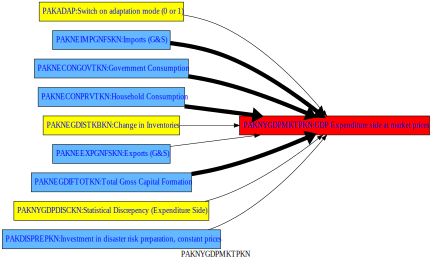

In [54]:
mpak.PAKNYGDPMKTPKN.tracepre(png=latex)

<span style='color:Blue'> ORIGINAL </span>

>Note on the ```png=latex```. <br>
>The default behavior when displaying graphs is to produce images in .svg format. <br>These images scale well and the ```mouse over``` 
>feature can be used. That is on mouseover the variable the equation for each variable is displayed
and on mouseover the edge the percent explanation for this variable is displayed<br> 
>Unfortunately this jupyter book can not be build into a latex form using images in svg format. Latex is in turn used to produce .pdf files. <br>
>In order when the version is made to a pdf file the latex variable has to be set to True in the start. If not used for a .pdf file set latex=0


<span style='color:Blue'> Comment: info is included in the cell above the graph </span>

<span style='color:Blue'> ORIGINAL </span>

### .tracepre(,,,filter=\<minimal impact>) Not all links are relevant. So the tree can be pruned.
Then only  links where the minimal impact is more than \<minimal impact> are show. 

### .tracepre(filter=minimal impact) Filter incoming variables

Filter on minimal impact, to include only the most relevant variables. Here we have set the minimal impact of the variables to be 20. 


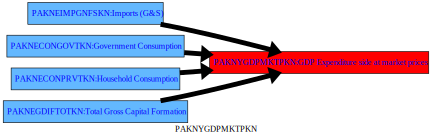

In [55]:
mpak.PAKNYGDPMKTPKN.tracepre(filter=20,png=latex)

<span style='color:Blue'> ORIGINAL </span>

### .tracepre(,,,up=\<upstream levels>) 
Combined with filter we can look behind the dependencies 

### tracepre(up=upstream_levels) Filter upstream levels

Use the filter 'up' to specify the number of upstream levels to include in the graph. 

Combined with the filter 'filter' we can take a look behind the dependencies 

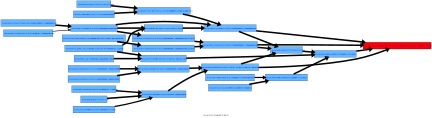

In [56]:
mpak.PAKNYGDPMKTPKN.tracepre(filter = 20,up=3,png=latex)

<span style='color:Blue'> ORIGINAL </span>

### tracepre(,fokus2='variable pattern',growthshow=True) Additional information regarding selected variables
The data for selected nodes can be displayed by mentioning the variable in fokus2= and growthshow=True will ensure that growth rates are included.

### tracepre(fokus2='variable pattern',growthshow=True) Include additional information 

To add additional information on selected variables, include the filter 'fokus2'. 'fokus2' accepts variable names as a string separated by a space. 

Set 'growthshow' to true to included growth rates. 

tracepre(,fokus2='variable pattern',growthshow=True) Additional information regarding selected variables
The data for selected nodes can be displayed by mentioning the variable in fokus2= and growthshow=True will ensure that growth rates are included.


Set the time period of the information to for example 2020 to 2024 by looping over the selected years.
<span style='color:Blue'> comment: explanation should be expanded </span>



<span style='color:Blue'> ORIGINAL </span>

Note:<br>
This is not the easy way. If you prefer to point and click use: <br>
>mpak.modeldash('PAKNYGDPMKTPKN')

<span style='color:Blue'> comment: doesnt work for me. </span>

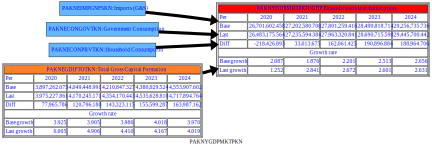

In [57]:
with mpak.set_smpl(2020,2024):
    mpak.PAKNYGDPMKTPKN.tracepre(filter = 20,fokus2='PAKNEGDIFTOTKN PAKNYGDPMKTPKN',growthshow=True)

<span style='color:Blue'> ORIGINAL </span>

title: .tracedep gives exactly the same for downstream (dependent variables) 

## .tracedep() Trace downstream variables

.tracedep does exactly the same then tracepre(), but for downstream (dependent variables) 

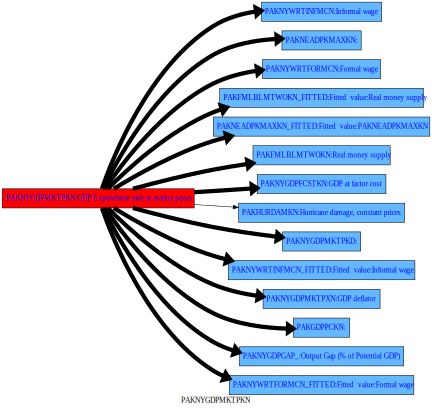

In [58]:
mpak.PAKNYGDPMKTPKN.tracedep()

<span style='color:Blue'> ORIGINAL </span>

title: .modeldash() The really convenient  way to navigate the dependency graph
This is the way to navigate the dependency graph. You can point and click and much more

Unfortunately you can not run it from this manual. Only if you are running a notebook. Then remove the # below

## modeldash

Built on Plotly Dash, modeldash is a really convenient and intuitive way to navigate the dependency graph.


In [2]:
#with mpak.set_smpl(2021,2026):
#   mpak.modeldash('PAKNYGDPMKTPKN',jupyter=True)  # delete # if running a live notebook 

And it will look like this  ![dash.png](dash.png)

<span style='color:Blue'> comment: It doesnt work for me. Maybe we should not include it, if it doesnt work for everybody? Or maybe do a separate tutorial on it for advanced visualization? </span>

<span style='color:Blue'> ORIGINAL </span>

title: Plot the adjacency matrix for current periode

## Plotting Adjacency matrices

### plotadjacency(,nolag=0) Adjacency matrix for current period

In [ ]:
mpak.plotadjacency(size=(20,20),nolag=0);


<span style='color:Blue'> ORIGINAL </span>

title: Plot the adjacency matrix including lagged effects


### plotadjacency(,nolag=1) Adjacency matrix including lagged effects

In [ ]:
mpak.plotadjacency(size=(20,20),nolag=1);